In [51]:
import tarfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm
from PIL import Image
from datetime import datetime
from IPython.display import Image, display

In [3]:
#First Step of the process images is extracted from the tar file

with tarfile.open('D:\Assignment\Data Mining & Machine Learning 2\Project\Team\wiki_crop.tar') as tar:
  tar.extractall(path=r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images') 

In [4]:
# Specify the local paths
source_folder_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\wiki_crop'
imgs_folder_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images'

# Ensure the destination directory exists
os.makedirs(imgs_folder_path, exist_ok=True)

exp_count = 0
for _rootdir, _, _files in tqdm(os.walk(source_folder_path)):
    for _file in _files:
        try: # Move all files (face images) into single folder named `all`
            os.rename(os.path.join(_rootdir, _file), os.path.join(imgs_folder_path, _file))
        except:  # If any error, continue
            exp_count += 1
            continue

print("Exceptions encountered: {}".format(exp_count))


C:\Users\vikra\AppData\Local\Temp\ipykernel_28972\3071539344.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _rootdir, _, _files in tqdm(os.walk(source_folder_path)):


0it [00:00, ?it/s]

Exceptions encountered: 0


In [5]:
# Second Step of the process checking if there are any duplicates images available 
def remove_duplicates(directory):
    # Dictionary to store file hashes
    hash_dict = {}
    duplicates = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
            with open(filepath, 'rb') as f:
                file_hash = hash(f.read())
                if file_hash in hash_dict:
                    duplicates.append(filepath)
                else:
                    hash_dict[file_hash] = filepath

    # Remove duplicate files
    for duplicate in duplicates:
        os.remove(duplicate)

In [6]:
data_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images'
remove_duplicates(data_directory)

In [7]:
print('Number of images: {}'.format(len(os.listdir(r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images'))))
#Duplicate Images was removed from the Data Number of images: 52583

Number of images: 52583


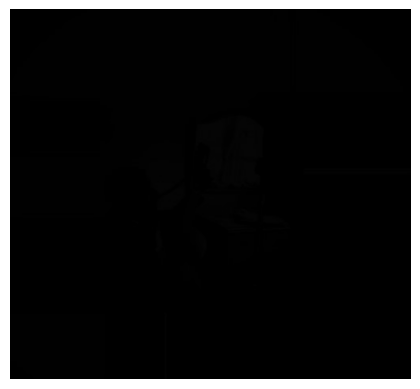

In [53]:
# Path to the image file
image_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images\4544_1898-05-05_1940.jpg'

# Read the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()


In [13]:
# Third Step we are removing the fully black images in the data set 


def remove_full_black_images(input_directory, output_directory):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate through images in the input directory
    for root, dirs, files in os.walk(input_directory):
        for filename in files:
            input_filepath = os.path.join(root, filename)

            # Read the image in color mode
            img = cv2.imread(input_filepath, cv2.IMREAD_COLOR)

            # Check if the image is None or all pixel values are zero (black)
            if img is None or not img.any():
                print(f"Skipping {input_filepath}. Image could not be read or is full black.")
                continue

            # Define the output filepath
            output_filepath = os.path.join(output_directory, filename)
            
            # Write the image to the output directory
            cv2.imwrite(output_filepath, img)

# Specify input and output directories
input_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images'
output_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\non_black_images'

# Remove full black images
remove_full_black_images(input_directory, output_directory)


Skipping D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images\10004113_1946-08-26_2007.jpg. Image could not be read or is full black.
Skipping D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images\670663_2015-02-16UTC08. Image could not be read or is full black.
Skipping D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\all_images\wiki.mat. Image could not be read or is full black.


In [14]:
# Forth Step standarization of the format to JPEG


def standardize_image_formats(input_directory, output_directory, output_format='JPEG'):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate through images in the input directory
    for root, dirs, files in os.walk(input_directory):
        for filename in files:
            input_filepath = os.path.join(root, filename)
            
            # Open the image
            img = Image.open(input_filepath)
            
            # Define the output filepath with the specified format
            output_filepath = os.path.join(output_directory, os.path.splitext(filename)[0] + f'.{output_format.lower()}')
            
            # Convert and save the image in the specified format
            img.convert('RGB').save(output_filepath, format=output_format)

# Example usage
input_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\non_black_images'
output_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\standardized_images'

# Convert images to JPEG format
standardize_image_formats(input_directory, output_directory, output_format='JPEG')


In [17]:
# Fifth Step Normalizing the pixel levels

def normalize_pixel_values(input_directory, output_directory):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate through images in the input directory
    for root, dirs, files in os.walk(input_directory):
        for filename in files:
            input_filepath = os.path.join(root, filename)

            # Read the image
            img = cv2.imread(input_filepath)

            # Check if the image is None (unable to read)
            if img is None:
                print(f"Skipping {input_filepath}. Unable to read the image.")
                continue

            # Normalize pixel values to the range [0, 1]
            img_normalized = img.astype('float32') / 255.0

            # Scale pixel values to [0, 255] range
            img_normalized_scaled = (img_normalized * 255).astype('uint8')

            # Define the output filepath
            output_filepath = os.path.join(output_directory, filename)

            # Save the normalized image
            cv2.imwrite(output_filepath, img_normalized_scaled)

# Example usage
input_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\non_black_images'
output_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images'

# Normalize pixel values of images
normalize_pixel_values(input_directory, output_directory)



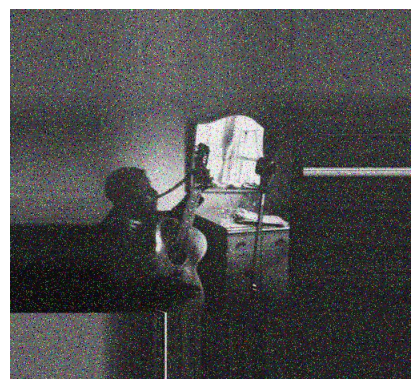

In [55]:
# Path to the image file
image_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\4544_1898-05-05_1940.jpg'

# Read the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()


In [19]:
# Sixth Step Noisy Images are removed
def remove_noisy_images(input_directory, output_directory, threshold=100):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate through images in the input directory
    for root, dirs, files in os.walk(input_directory):
        for filename in files:
            input_filepath = os.path.join(root, filename)

            # Read the image
            img = cv2.imread(input_filepath)

            # Check if the image is None (unable to read)
            if img is None:
                print(f"Skipping {input_filepath}. Unable to read the image.")
                continue

            # Compute the variance of pixel intensities as a measure of noise
            variance = cv2.Laplacian(img, cv2.CV_64F).var()

            # If the variance is below the threshold, consider the image as noisy
            if variance < threshold:
                print(f"Removing {input_filepath}. Variance: {variance:.2f}")
                continue

            # Define the output filepath
            output_filepath = os.path.join(output_directory, filename)

            # Save the image to the output directory
            cv2.imwrite(output_filepath, img)

# Example usage
input_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images'
output_directory = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\clean_images'

# Remove noisy images (threshold may need adjustment)
remove_noisy_images(input_directory, output_directory, threshold=100)


Removing D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\1003449_1920-08-10_1970.jpg. Variance: 92.34
Removing D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\1004854_1937-12-29_1961.jpg. Variance: 38.41
Removing D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\10063437_1986-03-06_2014.jpg. Variance: 72.36
Removing D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\1008071_1924-07-13_1945.jpg. Variance: 98.84
Removing D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\1008501_1971-10-09_2010.jpg. Variance: 95.64
Removing D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\1008840_1938-04-10_1976.jpg. Variance: 62.37
Removing D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\normalized_images\1

In [23]:
# Seventh Step the data is transformed the form file name the age is extracted 

# Specify the local path
imgs_folder_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\clean_images'
output_folder_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\transformed_images'

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

for _file in tqdm(os.listdir(imgs_folder_path)):
    try:
        # Example:- 23300_1962-06-19_2011.jpg --> Split: ["23300", "1964-06-19", "2011.jpg"]
        file_name = _file.split("_")
        # Date of birth of the person
        begin_date = datetime.strptime(file_name[1], '%Y-%m-%d')
        # The year the picture was taken - 2011 + assuming a mid-year date of month=7 & day=1 for when the photo was taken.
        end_date = datetime(year=int(file_name[2][:4]), month=7, day=1)
        age = end_date.year - begin_date.year
        if 10 <= age < 100: # Select only people with age in the range [10,100)
            # Rename face images file names with age and move to the output folder
            os.rename(
                os.path.join(imgs_folder_path, _file),
                os.path.join(output_folder_path, str(age) + "_" + file_name[0] + '.jpg')
            )
        else:
            # If invalid age, remove the image
            os.remove(os.path.join(imgs_folder_path, _file))
    except:
        # If any error, remove the image
        os.remove(os.path.join(imgs_folder_path, _file))

C:\Users\vikra\AppData\Local\Temp\ipykernel_28972\1976768471.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _file in tqdm(os.listdir(imgs_folder_path)):


  0%|          | 0/50349 [00:00<?, ?it/s]


=====	Age: 27	=====


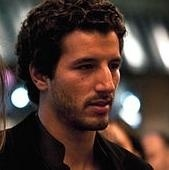


=====	Age: 27	=====


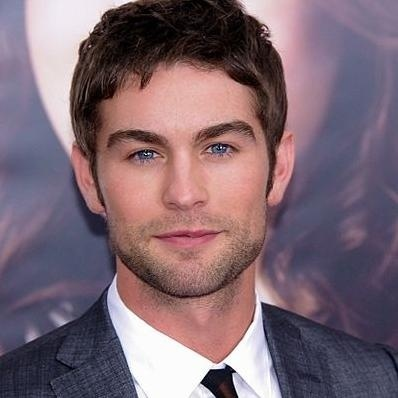

In [39]:
imgs_folder_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\transformed_images'

# Assuming imgs_folder_path is defined
num_samples = 2
random_choice = np.random.choice(os.listdir(imgs_folder_path), num_samples)

# Display images side by side
for i, choice in enumerate(random_choice):
    age = choice.split('_')[0]
    print(f"\n{'='*5}\tAge: {age}\t{'='*5}")
    display(Image(filename=os.path.join(imgs_folder_path, choice), width=200, height=200))
    if i % 2 == 1:
        print("\n\n")


=====	Age: 52	=====


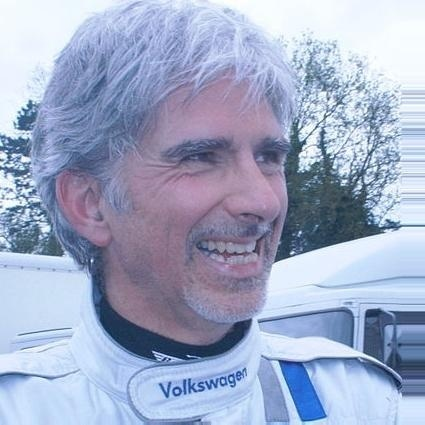


=====	Age: 72	=====


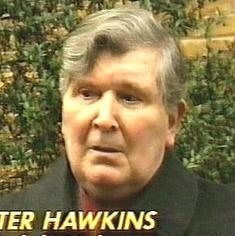


=====	Age: 35	=====


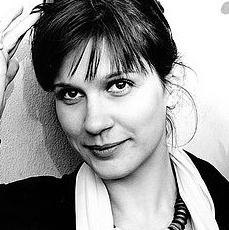


=====	Age: 23	=====


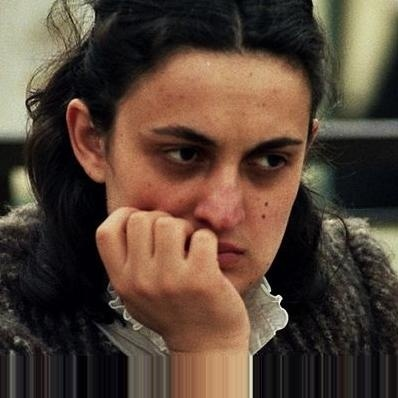


=====	Age: 26	=====


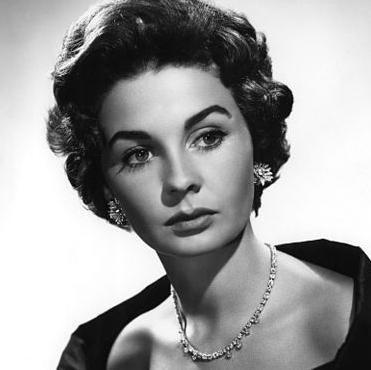

In [44]:
# Eight Step the data is transformed the form file name the age is extracted 

def validate_cleaned_data(imgs_folder_path, num_samples=5):
    # Get a list of cleaned images
    cleaned_images = [file for file in os.listdir(imgs_folder_path) if file.endswith('.jpg')]

    # Randomly select a sample of images
    random_choice = np.random.choice(cleaned_images, min(num_samples, len(cleaned_images)), replace=False)

    # Display the selected images
    for choice in random_choice:
        age = choice.split('_')[0]
        print(f"\n{'='*5}\tAge: {age}\t{'='*5}")
        display(Image(filename=os.path.join(imgs_folder_path, choice), width=200, height=200))

# Example usage
imgs_folder_path = r'D:\Assignment\Data Mining & Machine Learning 2\Project\Team\extracted_images\transformed_images'
num_samples = 5

# Validate cleaned data
validate_cleaned_data(imgs_folder_path, num_samples)
